In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
X, y = make_moons(100, noise=0.25, random_state=2)

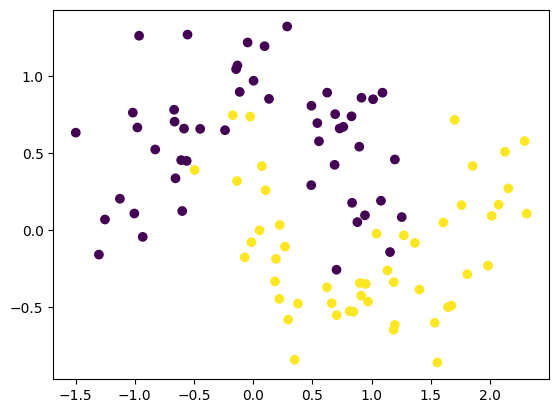

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [6]:
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [10]:
history1 = model1.fit(X,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6555 - loss: 0.6169 - val_accuracy: 0.9000 - val_loss: 0.3271
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8203 - loss: 0.4155 - val_accuracy: 0.9000 - val_loss: 0.2028
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8313 - loss: 0.4075 - val_accuracy: 0.9000 - val_loss: 0.1932
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8469 - loss: 0.3819 - val_accuracy: 0.9000 - val_loss: 0.2670
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8664 - loss: 0.3426 - val_accuracy: 0.9000 - val_loss: 0.2643
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8508 - loss: 0.3377 - val_accuracy: 0.9000 - val_loss: 0.2443
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8742 - loss: 0.3019 - val_accuracy: 0.9000 - val_loss: 0.1835
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8781 - loss: 0.2733 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


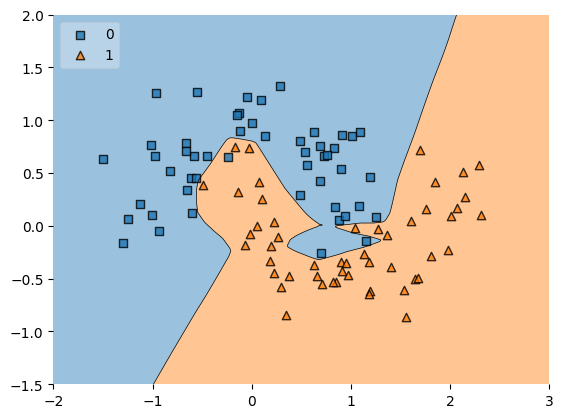

In [12]:
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

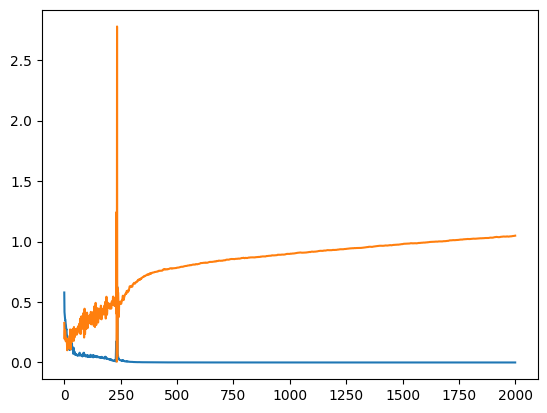

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

#Regularization

#L2 Regularization

In [28]:
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=l2(0.05)))
model2.add(Dense(128,activation='relu',kernel_regularizer=l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history2 = model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


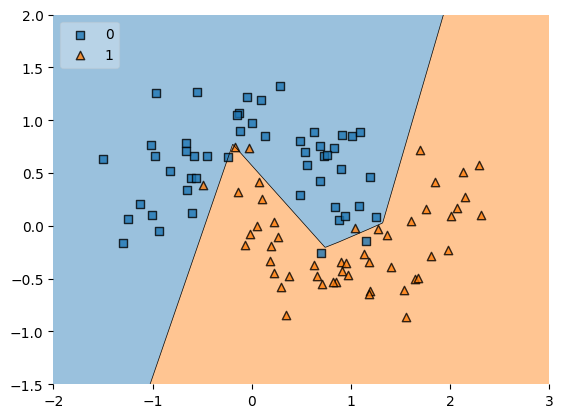

In [20]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

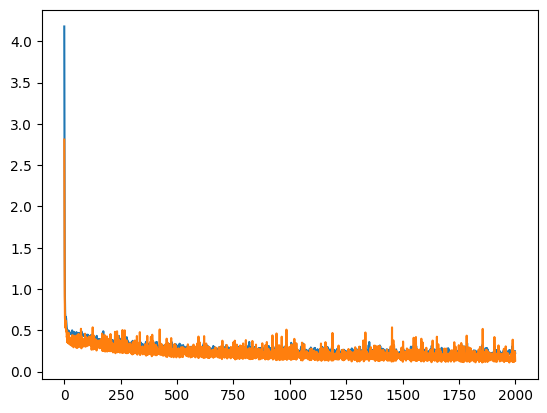

In [21]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [22]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

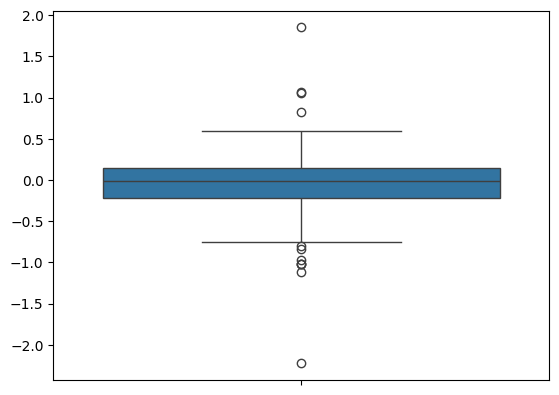

In [23]:
sns.boxplot(model1_weight_layer1)

<Axes: >

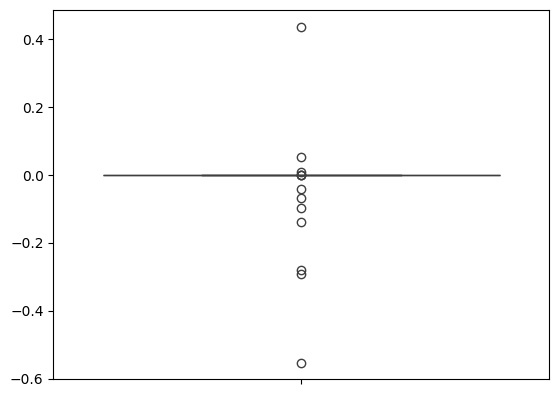

In [24]:
sns.boxplot(model2_weight_layer1)

In [25]:
model1_weight_layer1.max()

np.float32(1.8538479)

In [26]:
model2_weight_layer1.max()

np.float32(0.43670943)

<ipython-input-27-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-27-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

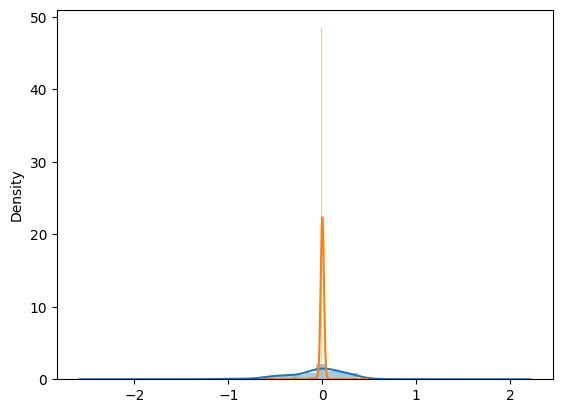

In [27]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

# L1 Regularization

In [30]:
model3 = Sequential()

model3.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=l1(0.05)))
model3.add(Dense(128,activation='relu',kernel_regularizer=l1(0.03)))
model3.add(Dense(1,activation='sigmoid'))

In [31]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [33]:
history3 = model3.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


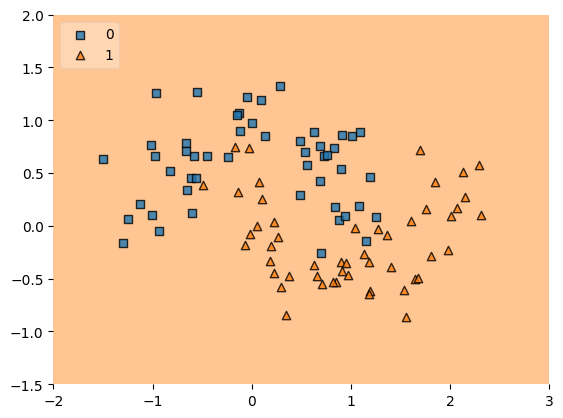

In [34]:
plot_decision_regions(X,y.astype('int'),clf=model3,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

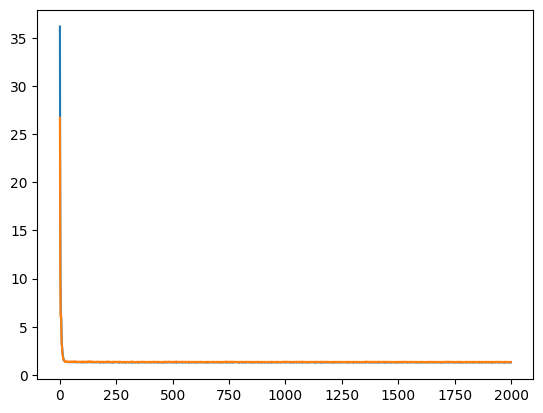

In [35]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])